In [36]:
path='DataCoSupplyChainDataset.csv'

In [37]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [38]:
#Read csv
df = pd.read_csv(path,encoding='unicode_escape')
df.head()

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [40]:
#print all column names
print(df.columns)

Index(['Type', 'Days for shipping (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late_delivery_risk', 'Category Id', 'Category Name', 'Customer City',
       'Customer Country', 'Customer Email', 'Customer Fname', 'Customer Id',
       'Customer Lname', 'Customer Password', 'Customer Segment',
       'Customer State', 'Customer Street', 'Customer Zipcode',
       'Department Id', 'Department Name', 'Latitude', 'Longitude', 'Market',
       'Order City', 'Order Country', 'Order Customer Id',
       'order date (DateOrders)', 'Order Id', 'Order Item Cardprod Id',
       'Order Item Discount', 'Order Item Discount Rate', 'Order Item Id',
       'Order Item Product Price', 'Order Item Profit Ratio',
       'Order Item Quantity', 'Sales', 'Order Item Total',
       'Order Profit Per Order', 'Order Region', 'Order State', 'Order Status',
       'Order Zipcode', 'Product Card Id', 'Product Category Id',
       'Product De

In [41]:
def data_info(data):
    print('1) Number of columns are : ',data.shape[1])
    print('2) Number of rows are : ',data.shape[0])
    print('3) Total number of data-points :',data.size)
    numerical_features = [f for f in data.columns if data[f].dtypes!='O']
    print('4) Count of Numerical Features :',len(numerical_features))
    cat_features = [c for c in data.columns if data[c].dtypes=='O']
    print('5) Count of Categorical Features :',len(cat_features))
data_info(df)

1) Number of columns are :  53
2) Number of rows are :  180519
3) Total number of data-points : 9567507
4) Count of Numerical Features : 29
5) Count of Categorical Features : 24


In [42]:
#Check for missing values
df.isnull().sum()


Type                                  0
Days for shipping (real)              0
Days for shipment (scheduled)         0
Benefit per order                     0
Sales per customer                    0
Delivery Status                       0
Late_delivery_risk                    0
Category Id                           0
Category Name                         0
Customer City                         0
Customer Country                      0
Customer Email                        0
Customer Fname                        0
Customer Id                           0
Customer Lname                        8
Customer Password                     0
Customer Segment                      0
Customer State                        0
Customer Street                       0
Customer Zipcode                      3
Department Id                         0
Department Name                       0
Latitude                              0
Longitude                             0
Market                                0


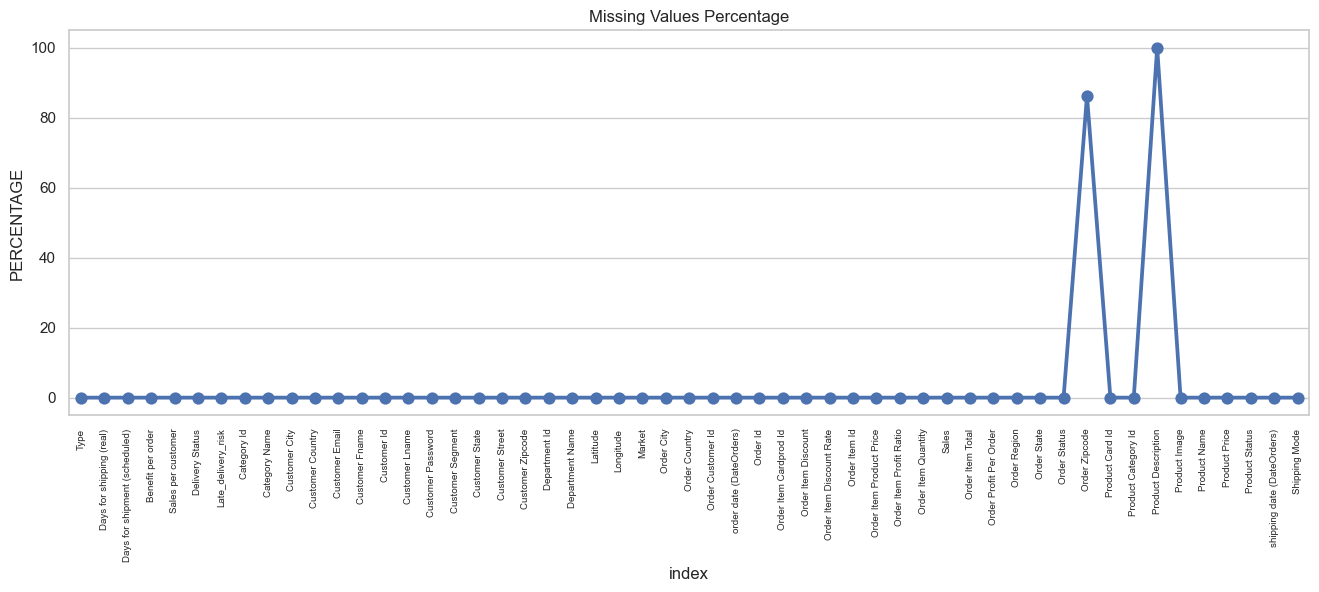

In [43]:
plt.figure(figsize = (16,5))
missing_values = pd.DataFrame(df.isnull().sum()*100/df.shape[0]).reset_index()
ax = sns.pointplot(x='index', y=0, data=missing_values)
plt.xticks(rotation =90,fontsize =7)
plt.title('Missing Values Percentage')
plt.ylabel("PERCENTAGE")
plt.show()

In [44]:
#Drop columns with missing values
df.dropna(axis=1, inplace=True)
#Check for missing values again
df.isnull().sum()


Type                             0
Days for shipping (real)         0
Days for shipment (scheduled)    0
Benefit per order                0
Sales per customer               0
Delivery Status                  0
Late_delivery_risk               0
Category Id                      0
Category Name                    0
Customer City                    0
Customer Country                 0
Customer Email                   0
Customer Fname                   0
Customer Id                      0
Customer Password                0
Customer Segment                 0
Customer State                   0
Customer Street                  0
Department Id                    0
Department Name                  0
Latitude                         0
Longitude                        0
Market                           0
Order City                       0
Order Country                    0
Order Customer Id                0
order date (DateOrders)          0
Order Id                         0
Order Item Cardprod 

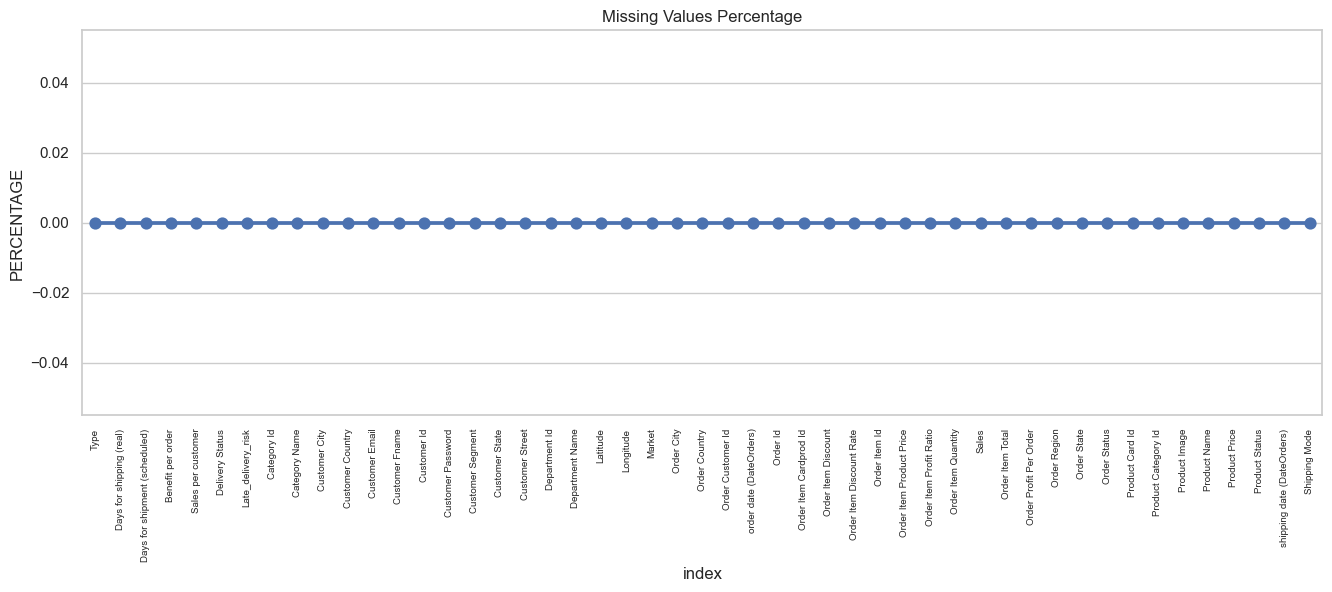

In [45]:
plt.figure(figsize = (16,5))
missing_values = pd.DataFrame(df.isnull().sum()*100/df.shape[0]).reset_index()
ax = sns.pointplot(x='index', y=0, data=missing_values)
plt.xticks(rotation =90,fontsize =7)
plt.title('Missing Values Percentage')
plt.ylabel("PERCENTAGE")
plt.show()

In [46]:
#save the cleaned data
df.to_csv('CleanedData.csv',index=False)

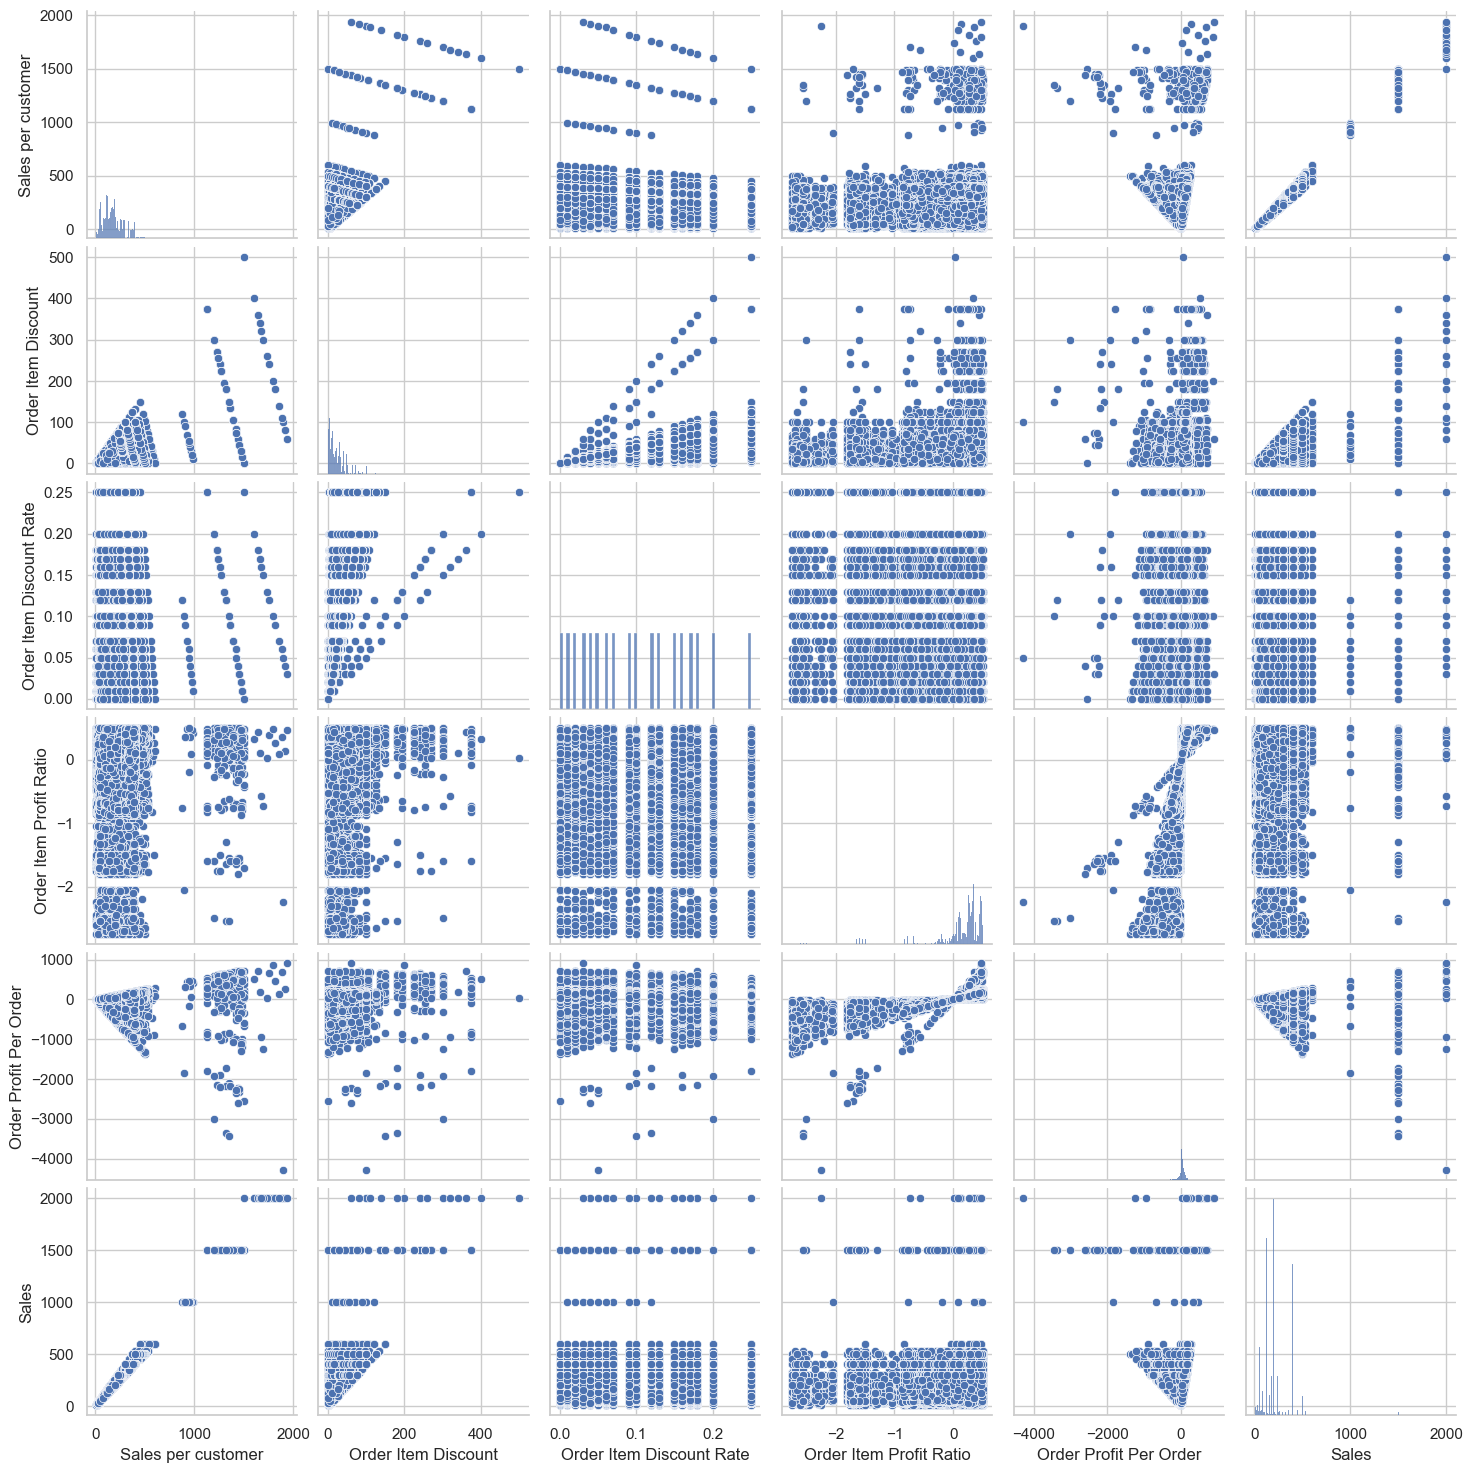

In [47]:
# Any outlier
import seaborn as sns
import matplotlib.pyplot as plt
columns_to_plot = ['Sales per customer', 'Order Item Discount', 'Order Item Discount Rate', 'Order Item Profit Ratio', 'Order Profit Per Order', 'Sales']
df_selected = df[columns_to_plot]
sns.pairplot(df_selected)
plt.show()

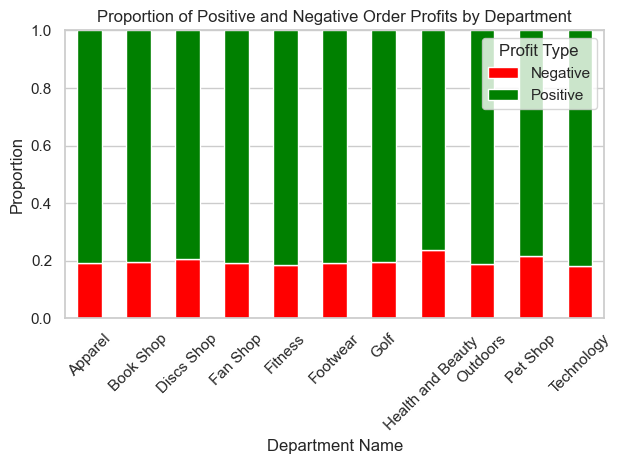

In [48]:
df_g = df[['Department Name', 'Order Profit Per Order']].copy()

# Create a new column for profit type
df_g['Profit Type'] = np.where(df_g['Order Profit Per Order'] > 0, 'Positive', 'Negative')

# Group by and count
category_profit_counts = df_g.groupby(['Department Name', 'Profit Type']).size().unstack(fill_value=0)

# Calculate proportions
category_profit_proportions = category_profit_counts.div(category_profit_counts.sum(axis=1), axis=0)

# Plot
category_profit_proportions.plot(kind='bar', stacked=True, color=['red', 'green'])
plt.ylabel('Proportion')
plt.title('Proportion of Positive and Negative Order Profits by Department')
plt.legend(title='Profit Type')
plt.ylim(0, 1.0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18000\2416388199.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Number Type', y='Count', data=data_his, palette='coolwarm')


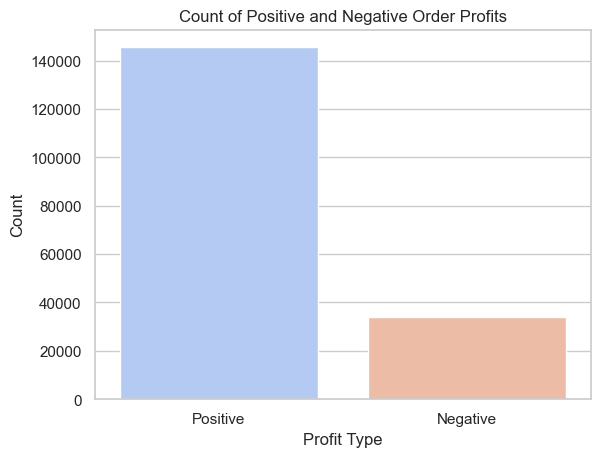

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.set(style="whitegrid")
data = df['Order Profit Per Order']
positive_count = data[data> 0].count()
negative_count = data[data < 0].count()

data_his = pd.DataFrame({
    'Number Type': ['Positive', 'Negative'],
    'Count': [positive_count, negative_count]
})
sns.barplot(x='Number Type', y='Count', data=data_his, palette='coolwarm')
plt.title('Count of Positive and Negative Order Profits')
plt.xlabel('Profit Type')
plt.ylabel('Count')
plt.show()

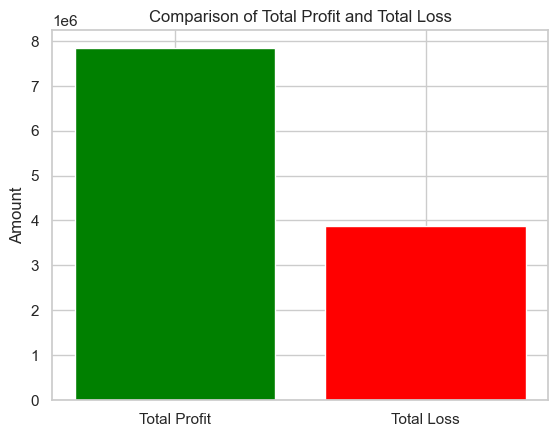

In [50]:
data = df['Order Profit Per Order']
total_profit = data[data> 0].sum()
total_loss = data[data < 0].sum()

categories = ['Total Profit', 'Total Loss']
values = [total_profit, abs(total_loss)]

# plt.figure(figsize=(8, 6))
plt.bar(categories, values, color=['green', 'red'])
plt.title('Comparison of Total Profit and Total Loss')
plt.ylabel('Amount')
plt.show()

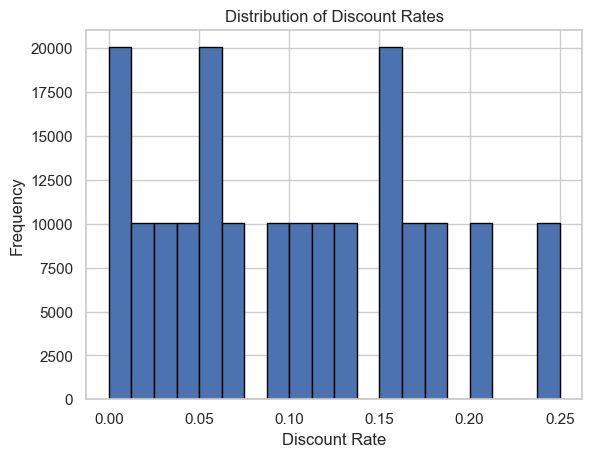

In [51]:
# The Distribution of Discount Rates
plt.hist(df['Order Item Discount Rate'], bins=20, edgecolor='black')
plt.title('Distribution of Discount Rates')
plt.xlabel('Discount Rate')
plt.ylabel('Frequency')
plt.show()

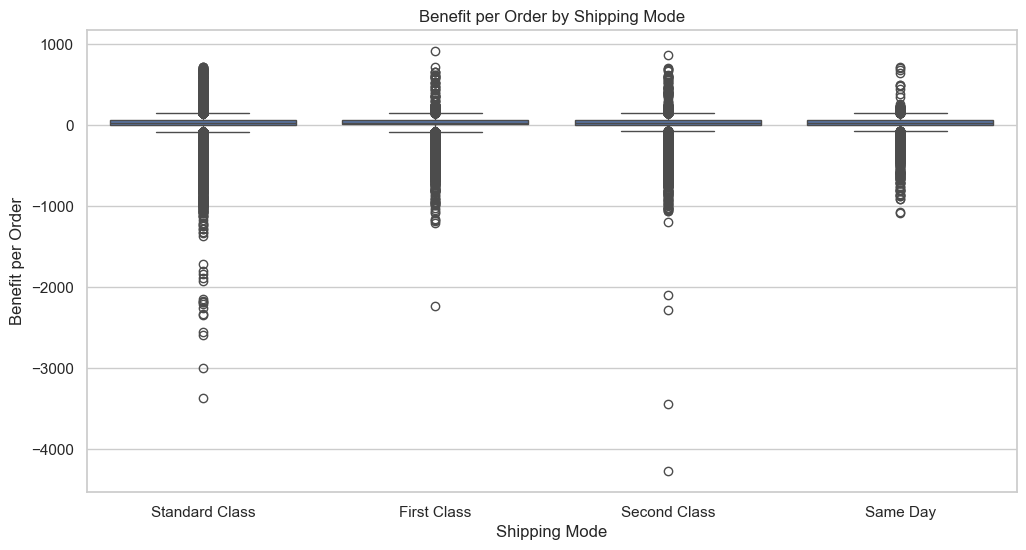

In [52]:
sns.set(style="whitegrid")

# Example box plot: Benefit per order across different Shipping Modes
plt.figure(figsize=(12, 6))
sns.boxplot(x='Shipping Mode', y='Benefit per order', data=df)

# Add titles and labels
plt.title('Benefit per Order by Shipping Mode')
plt.xlabel('Shipping Mode')
plt.ylabel('Benefit per Order')

# Show the plot
plt.show()

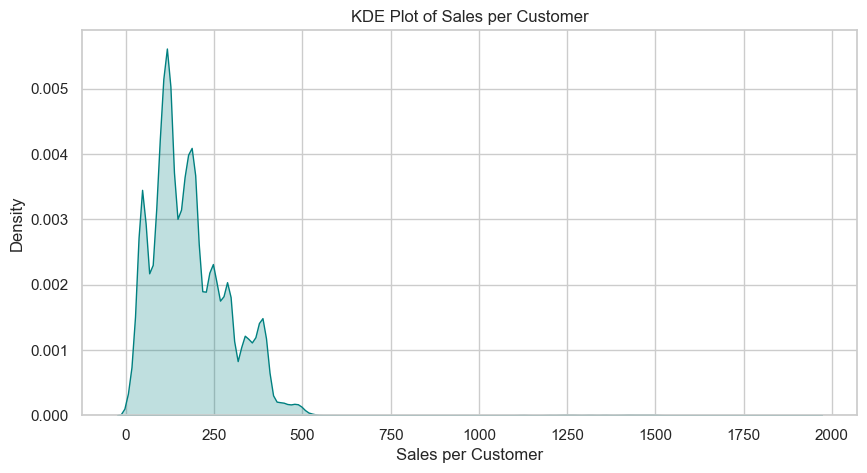

In [53]:
sns.set(style="whitegrid")

# Create KDE plot
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df, x='Sales per customer', fill=True, color='teal')

# Labels and title
plt.title('KDE Plot of Sales per Customer')
plt.xlabel('Sales per Customer')
plt.ylabel('Density')

# Show the plot
plt.show()

In [54]:
df.shape

(180519, 49)

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 49 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [56]:
#Find the categorical features
cat_features = [c for c in df.columns if df[c].dtypes=='O']
#Find the numerical features
numerical_features = [f for f in df.columns if df[f].dtypes!='O']
#print number of categorical and numerical features
print('Number of Categorical Features:',len(cat_features))
print('Number of Numerical Features:',len(numerical_features))

Number of Categorical Features: 23
Number of Numerical Features: 26


In [57]:
#Label encoding of categorical features
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for c in cat_features:
    df[c] = le.fit_transform(df[c])
#Check the first 5 rows of the dataframe
df.head()



,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order State,Order Status,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,1,3,4,91.250000,314.640015,0,0,73,40,66,...,475,2,1360,73,78,78,327.75,0,27149,3
1,3,5,4,-249.089996,311.359985,1,1,73,40,66,...,841,5,1360,73,78,78,327.75,0,2209,3
2,0,4,4,-247.779999,309.720001,3,0,73,40,452,...,841,1,1360,73,78,78,327.75,0,1980,3
3,1,3,4,22.860001,304.809998,0,0,73,40,285,...,835,2,1360,73,78,78,327.75,0,1752,3
4,2,2,4,134.210007,298.250000,0,0,73,40,66,...,835,6,1360,73,78,78,327.75,0,1528,3


In [58]:
#Standardize the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
for c in numerical_features:
    df[c] = scaler.fit_transform(df[c].values.reshape(-1,1))
#Check the first 5 rows of the dataframe
df.head()


,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order State,Order Status,Product Card Id,Product Category Id,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,1,-0.306491,0.777152,0.663343,1.095708,0,-1.101733,2.630978,40,66,...,475,2,1.983945,2.630978,78,78,1.334822,0.0,27149,3
1,3,0.925251,0.777152,-2.595582,1.068384,1,0.907661,2.630978,40,66,...,841,5,1.983945,2.630978,78,78,1.334822,0.0,2209,3
2,0,0.309380,0.777152,-2.583038,1.054722,3,-1.101733,2.630978,40,452,...,841,1,1.983945,2.630978,78,78,1.334822,0.0,1980,3
3,1,-0.306491,0.777152,0.008474,1.013820,0,-1.101733,2.630978,40,285,...,835,2,1.983945,2.630978,78,78,1.334822,0.0,1752,3
4,2,-0.922361,0.777152,1.074706,0.959174,0,-1.101733,2.630978,40,66,...,835,6,1.983945,2.630978,78,78,1.334822,0.0,1528,3


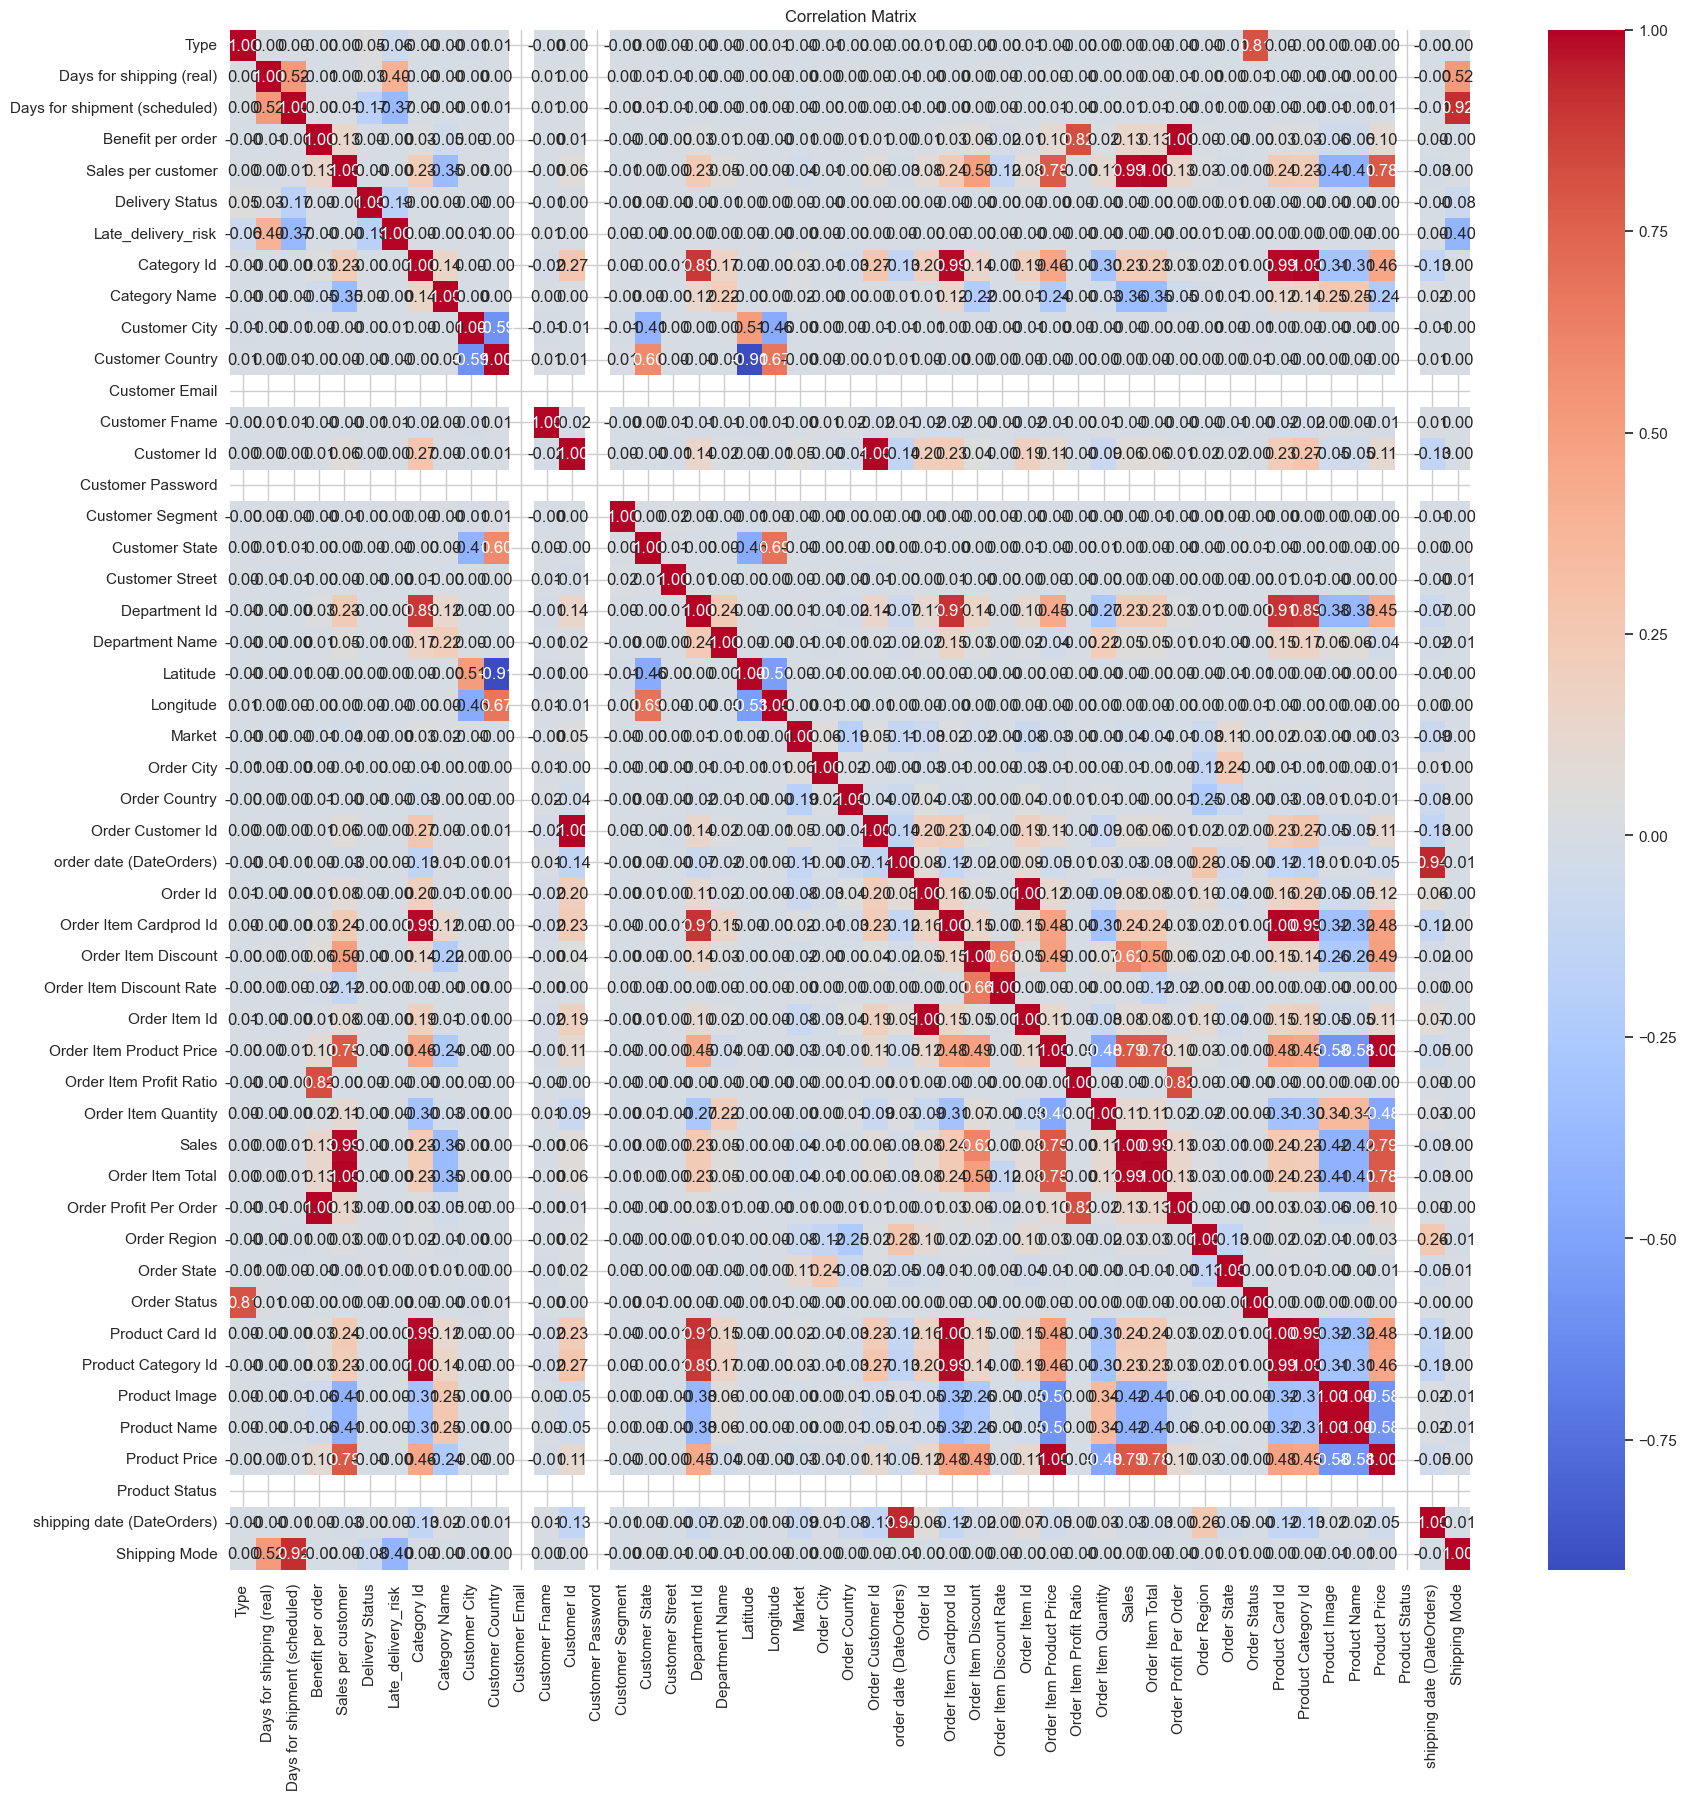

In [59]:
#correlation matrix
corr = df.corr()
#plotting the correlation matrix
plt.figure(figsize=(20,20))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


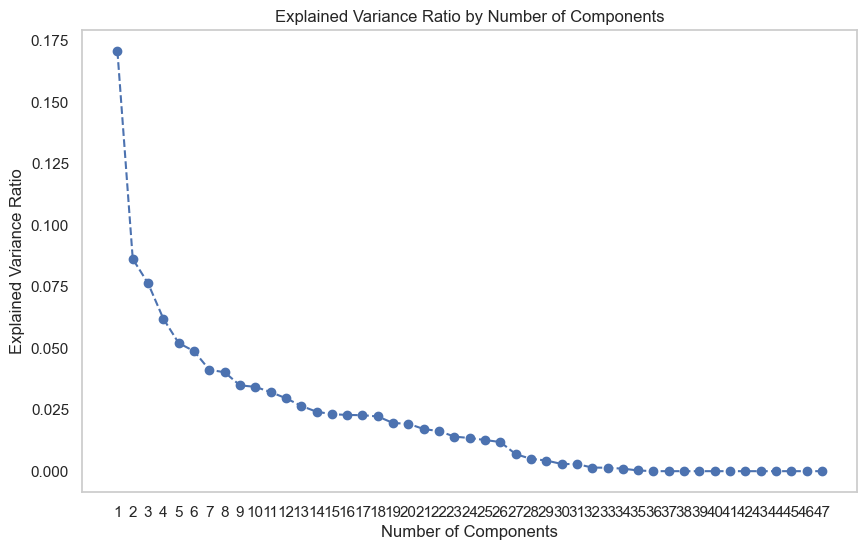

In [71]:
#PCA for 10 components
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pca= PCA()
X1 = df.drop(['Days for shipping (real)','Days for shipment (scheduled)'],axis=1)
y1 = df[['Days for shipping (real)','Days for shipment (scheduled)']]
X1 = StandardScaler().fit_transform(X1)
X1.shape, y1.shape
pca.fit(X1)
X_pca = pca.transform(X1)
X_pca.shape, y1.shape
#give graph to find the number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, X1.shape[1]+1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, X1.shape[1]+1))
plt.grid()
plt.show()



In [61]:
x = df.drop(['Days for shipping (real)','Days for shipment (scheduled)'],axis=1)
y = df[['Days for shipping (real)','Days for shipment (scheduled)']]
x.shape,y.shape

((180519, 47), (180519, 2))

In [62]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print('x_train shape:',x_train.shape)

x_train shape: (144415, 47)


In [63]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor(random_state=42)
model.fit(x_train,y_train)


DecisionTreeRegressor(random_state=42)

In [64]:
#Predicting the test set results
y_pred=model.predict(x_test)
#Checking the predicted values
y_pred[:5]
#Checking the actual values 
y_test.head()

,Days for shipping (real),Days for shipment (scheduled)
80120,0.925251,0.777152
19670,-0.922361,-1.405546
114887,-0.922361,0.777152
120110,0.925251,0.777152
56658,-0.922361,0.777152


In [65]:
#calculate the mean absolute error
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print('Mean Absolute Error:',mae)
#calculate the mean squared error
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:',mse)
#calculate R2 score
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print('R2 Score:',r2)



Mean Absolute Error: 0.032163313954611784
Mean Squared Error: 0.02977832657004513
R2 Score: 0.9702164098299612


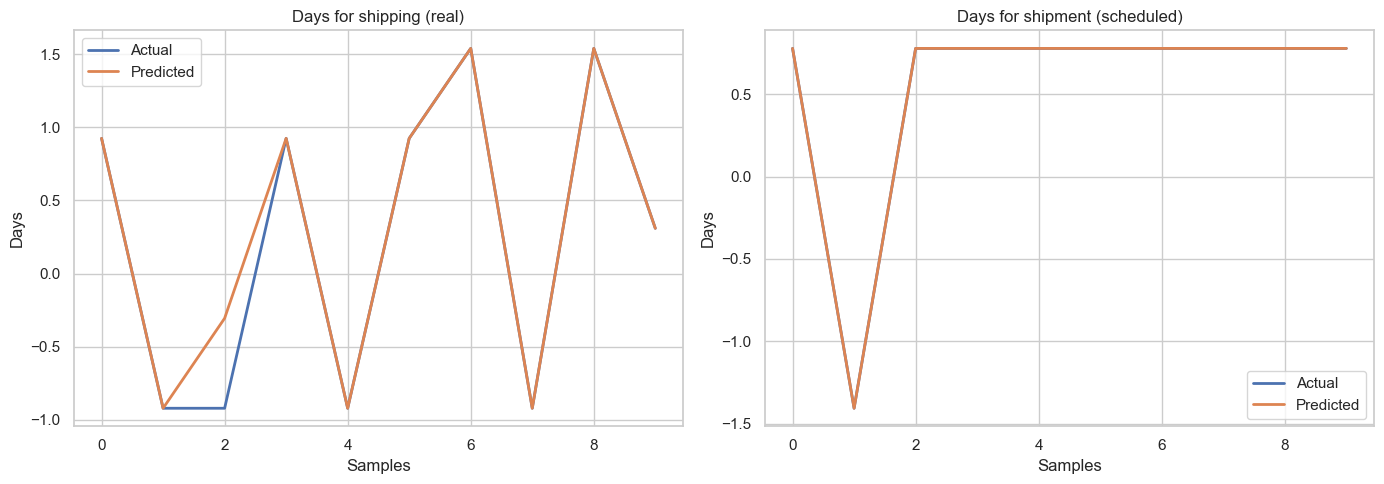

In [66]:
import matplotlib.pyplot as plt

# Select how many samples to visualize
num_samples = 10
y_test_np = y_test.to_numpy()

plt.figure(figsize=(14, 5))

# Plot for 'Days for shipping (real)'
plt.subplot(1, 2, 1)
plt.plot(y_test_np[:num_samples, 0], label='Actual', linewidth=2)
plt.plot(y_pred[:num_samples, 0], label='Predicted', linewidth=2)
plt.title('Days for shipping (real)')
plt.xlabel('Samples')
plt.ylabel('Days')
plt.legend()

# Plot for 'Days for shipment (scheduled)'
plt.subplot(1, 2, 2)
plt.plot(y_test_np[:num_samples, 1], label='Actual', linewidth=2)
plt.plot(y_pred[:num_samples, 1], label='Predicted', linewidth=2)
plt.title('Days for shipment (scheduled)')
plt.xlabel('Samples')
plt.ylabel('Days')
plt.legend()

plt.tight_layout()
plt.show()



In [67]:
from sklearn.linear_model import LinearRegression

model2 = LinearRegression()
model2.fit(x_train,y_train)
pred2=model2.predict(x_test)

In [68]:
#r2 score
r2 = r2_score(y_test, pred2)
print('R2 Score:',r2)
#mean absolute error
mae = mean_absolute_error(y_test, pred2)
print('Mean Absolute Error:',mae)
#mean squared error
mse = mean_squared_error(y_test, pred2)
print('Mean Squared Error:',mse)

R2 Score: 0.8105461594983898
Mean Absolute Error: 0.3307480638254189
Mean Squared Error: 0.18945796510994323


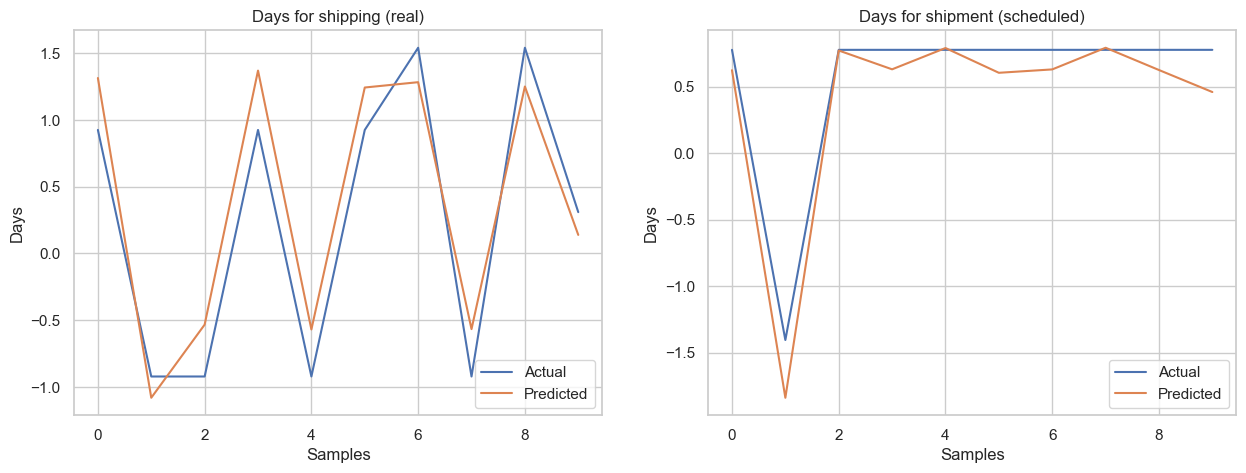

In [69]:
#predict 10 samples and plot curves for 2 output variables
pred2 = model2.predict(x_test[:10])
y_test = y_test[:10].values
pred2 = pred2[:10]
y_test = y_test[:10]
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(y_test[:,0], label='Actual')
plt.plot(pred2[:,0], label='Predicted')
plt.title('Days for shipping (real)')
plt.xlabel('Samples')
plt.ylabel('Days')
plt.legend()
plt.subplot(1,2,2)
plt.plot(y_test[:,1], label='Actual')
plt.plot(pred2[:,1], label='Predicted')
plt.title('Days for shipment (scheduled)')
plt.xlabel('Samples')
plt.ylabel('Days')
plt.legend()
plt.show()
